In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold,datasets,decomposition
import pickle
import time

import networkx as nx
from scipy import spatial
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

import matplotlib.pyplot as plt

In [3]:
from umap import UMAP
import phate

In [11]:
mnist = datasets.fetch_openml("mnist_784", version=1)
color = mnist.target.astype(int)

C:\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
type(mnist)

sklearn.utils._bunch.Bunch

In [20]:
mnist.data.shape

(70000, 784)

In [21]:
pca = decomposition.PCA(n_components=100)
X = pca.fit_transform(mnist.data)

In [22]:
sum(pca.explained_variance_ratio_)

0.9146205079719261

In [4]:
with open('./data/mnist_X.dat', 'wb') as outfile:
    pickle.dump(X, outfile, pickle.HIGHEST_PROTOCOL)
    
with open('./data/mnist_color.dat', 'wb') as outfile:
    pickle.dump(color, outfile, pickle.HIGHEST_PROTOCOL)

In [6]:
import pickle
with open('./mnist_X.dat', 'rb') as infile:
    X = pickle.load(infile)
with open('./mnist_color.dat', 'rb') as infile:
    color = pickle.load(infile)

The code runs 349s.


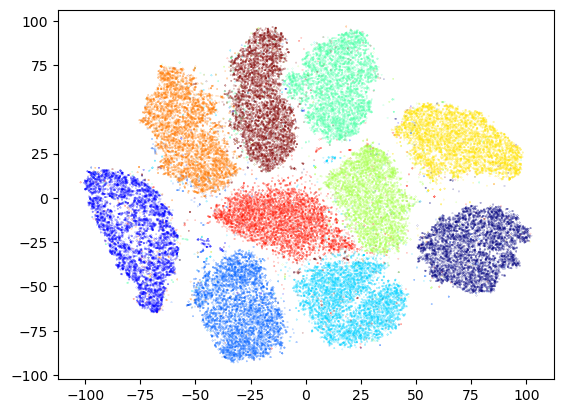

In [11]:
start_time = time.time()
tsne = manifold.TSNE(perplexity=50,init='pca',random_state=0) # n_components=2,  perplexity=5, init='pca', n_iter=300
Y_tsne = tsne.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=color,s =.01,cmap='jet')

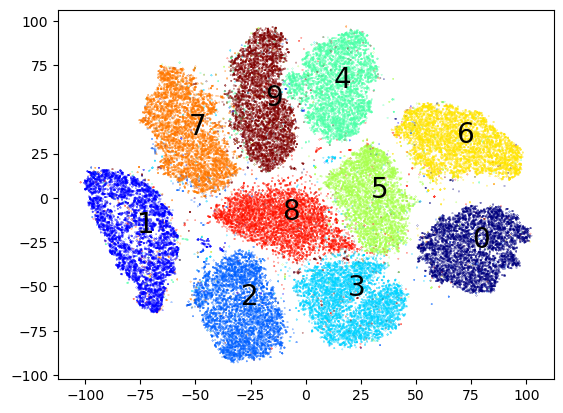

In [12]:
Y_tsne_df = pd.DataFrame(Y_tsne)
clusters = Y_tsne_df.groupby(color).mean()
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=color,s =.01,cmap='jet')
for i in range(10):
    plt.text(clusters[0][i],clusters[1][i],str(clusters.index.to_numpy()[i]),fontsize=20)
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=color,s =.01,cmap='jet')

In [8]:
reducer = UMAP(random_state=0)  # n_neighbors=25,min_dist=0.6
Y_umap = reducer.fit_transform(X)
# plt.scatter(Y_umap[:,0],Y_umap[:,1], c=color,s =.01,cmap="jet")

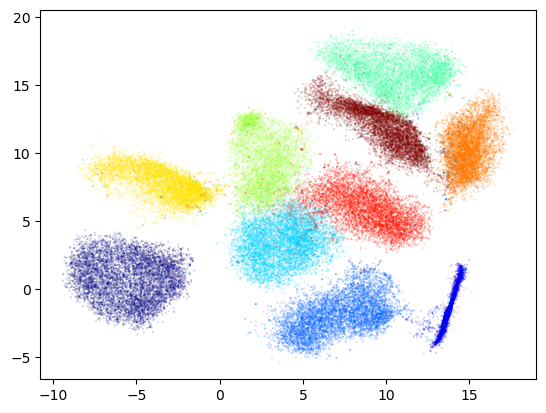

In [7]:
reducer = UMAP(densmap=True,random_state=0)  # n_neighbors=25,min_dist=0.6
Y_umap = reducer.fit_transform(X)
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=color,s =.01,cmap="jet")

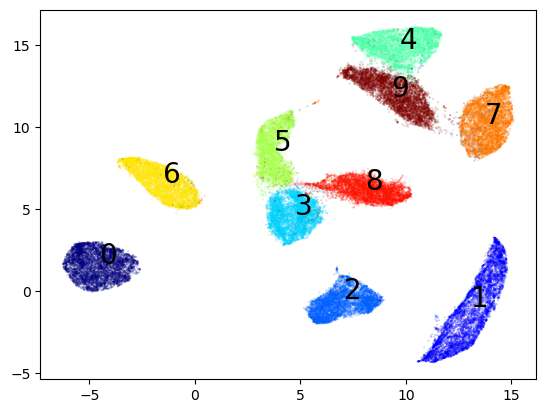

In [9]:
Y_umap_df = pd.DataFrame(Y_umap)
clusters = Y_umap_df.groupby(color).mean()
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=color,s =.01,cmap='jet')
for i in range(10):
    plt.text(clusters[0][i],clusters[1][i],str(clusters.index.to_numpy()[i]),fontsize=20)
plt.show()

In [5]:
start_time = time.time()
phate_operator = phate.PHATE(knn=150,random_state=0,verbose=2) # verbose=9,
Y_phate = phate_operator.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

# plt.scatter(Y_phate[:,0],Y_phate[:,1], c=color,s =.01,cmap="jet")

Set graphtools logging to DEBUG
Calculating PHATE...
  Running PHATE on 70000 observations and 100 variables.
  Calculating graph and diffusion operator...
    Building knn graph with landmarks
    Initializing [<class 'graphtools.graphs.kNNGraph'>, <class 'graphtools.graphs.LandmarkGraph'>] with arguments theta='None', bandwidth_scale='1.0', kernel_symm='+', random_state='0', distance='euclidean', rank_threshold='None', anisotropy='0', knn='150', thresh='0.0001', initialize='True', bandwidth='None', verbose='2', decay='40', n_jobs='1', knn_max='None', n_pca='None', n_svd='100', n_landmark='2000'
    Initializing kernel...
    Calculating KNN search...
    Calculated KNN search in 1061.08 seconds.
    Calculating affinities...
      search_knn = 906; 87 remaining
      radius search on 87
    Calculated affinities in 7.10 seconds.
    Using addition symmetrization.
  Calculated graph and diffusion operator in 1070.17 seconds.
  Calculating landmark operator...
    Calculating SVD...
  

In [1]:
Y_phate_df = pd.DataFrame(Y_phate)
clusters = Y_phate_df.groupby(color).mean()
plt.scatter(Y_phate[:,0],Y_phate[:,1], c=color,s =.01,cmap='jet')
for i in range(10):
    plt.text(clusters[0][i],clusters[1][i],str(clusters.index.to_numpy()[i]),fontsize=15)
plt.show()

NameError: name 'pd' is not defined

Set graphtools logging to DEBUG
Calculating PHATE...
  Running PHATE on 70000 observations and 100 variables.
  Calculating graph and diffusion operator...
    Building knn graph with landmarks
    Initializing [<class 'graphtools.graphs.kNNGraph'>, <class 'graphtools.graphs.LandmarkGraph'>] with arguments thresh='0.0001', bandwidth='None', random_state='0', verbose='2', kernel_symm='+', theta='None', n_pca='None', n_jobs='1', rank_threshold='None', knn='80', anisotropy='0', initialize='True', bandwidth_scale='1.0', knn_max='None', decay='40', distance='euclidean', n_landmark='2000', n_svd='100'
    Initializing kernel...
    Calculating KNN search...
    Calculated KNN search in 1044.94 seconds.
    Calculating affinities...
      search_knn = 486; 105 remaining
      radius search on 105
    Calculated affinities in 4.83 seconds.
    Using addition symmetrization.
  Calculated graph and diffusion operator in 1050.79 seconds.
  Calculating landmark operator...
    Calculating SVD...
 

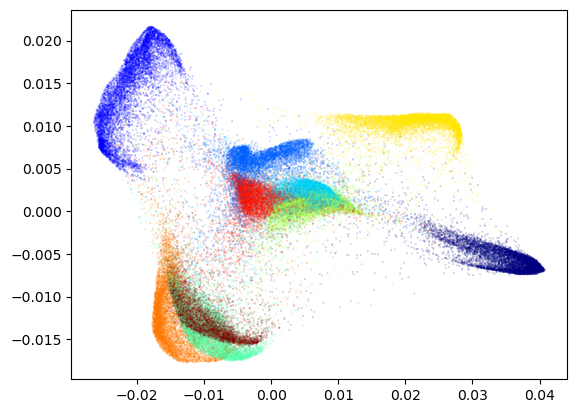

In [9]:
start_time = time.time()
phate_operator = phate.PHATE(knn=80,random_state=0,verbose=2) # verbose=9,
Y_phate = phate_operator.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_phate[:,0],Y_phate[:,1], c=color,s =.01,cmap="jet")

In [15]:
pd.DataFrame(Y_tsne).to_csv("./data/mnist_Y_tsne.csv",header=None, index=None)
pd.DataFrame(Y_umap).to_csv("./data/mnist_Y_umap.csv",header=None, index=None)
pd.DataFrame(Y_phate).to_csv("./data/mnist_Y_phate.csv",header=None, index=None)